# A) Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# B) Accessing data from the datasheet:-

In [2]:
df = pd.read_csv(r'/home/misfit/Downloads/Capstone Project 10-7-24/CAR DETAILS.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# C) Data preprocessing/cleansing

### a) Checking datas size, types and description


In [3]:
df.shape

(4340, 8)

In [4]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### b) Checking for null values

In [6]:
df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

There is no null values in the dataset, so no need of null value handling process. next we forward towards the Duplicate values.

### c) Check the duplicate values

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [9]:
df.duplicated().sum()

763

In [10]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [11]:
df.drop_duplicates(inplace=True) # removing duplicates from the df

let's save the cleaned dataset.

In [12]:
df.to_csv('Car_Cleaned_Data',index =False)

In [15]:
# let's check the data again
Car_Cleaned_Data=pd.read_csv(r'/home/misfit/Downloads/Capstone Project 10-7-24/Car_Cleaned_Data')

### D) After Data Cleaning let's move towards EDA process
Create some visualization and lets compare the dataset values

Let's catorize the columns in numerical and catogorical columns

In [16]:
numeric_cols = Car_Cleaned_Data.select_dtypes(include=['number'])
catogeric_cols = Car_Cleaned_Data.select_dtypes(include=['object'])

### I ) Let's do some univariate Data Analysis using Numerical columns

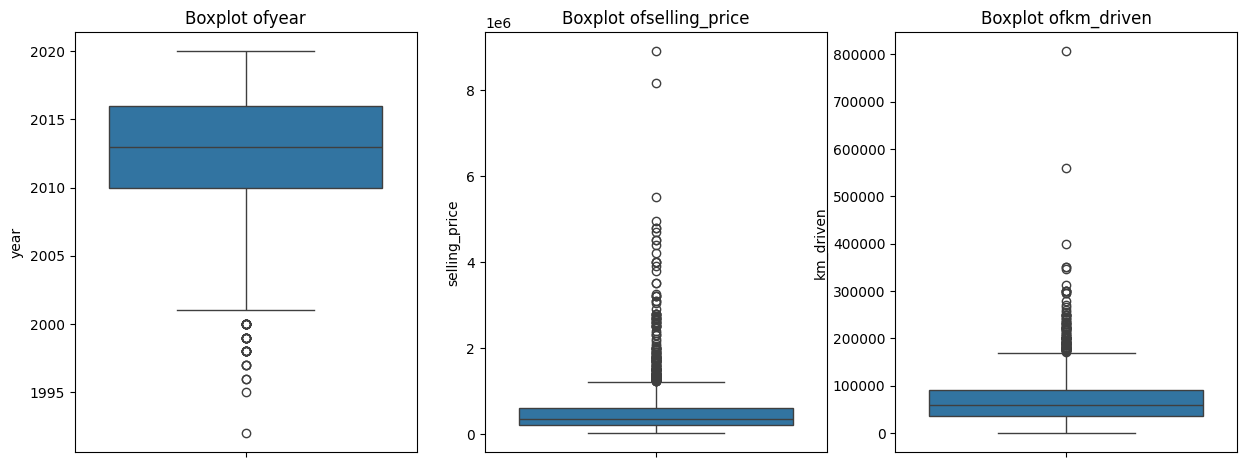

In [17]:
plt.figure(figsize=(15,12))
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=Car_Cleaned_Data[col])
    plt.title(f'Boxplot of{col}')

plt.tight_layout
plt.show()

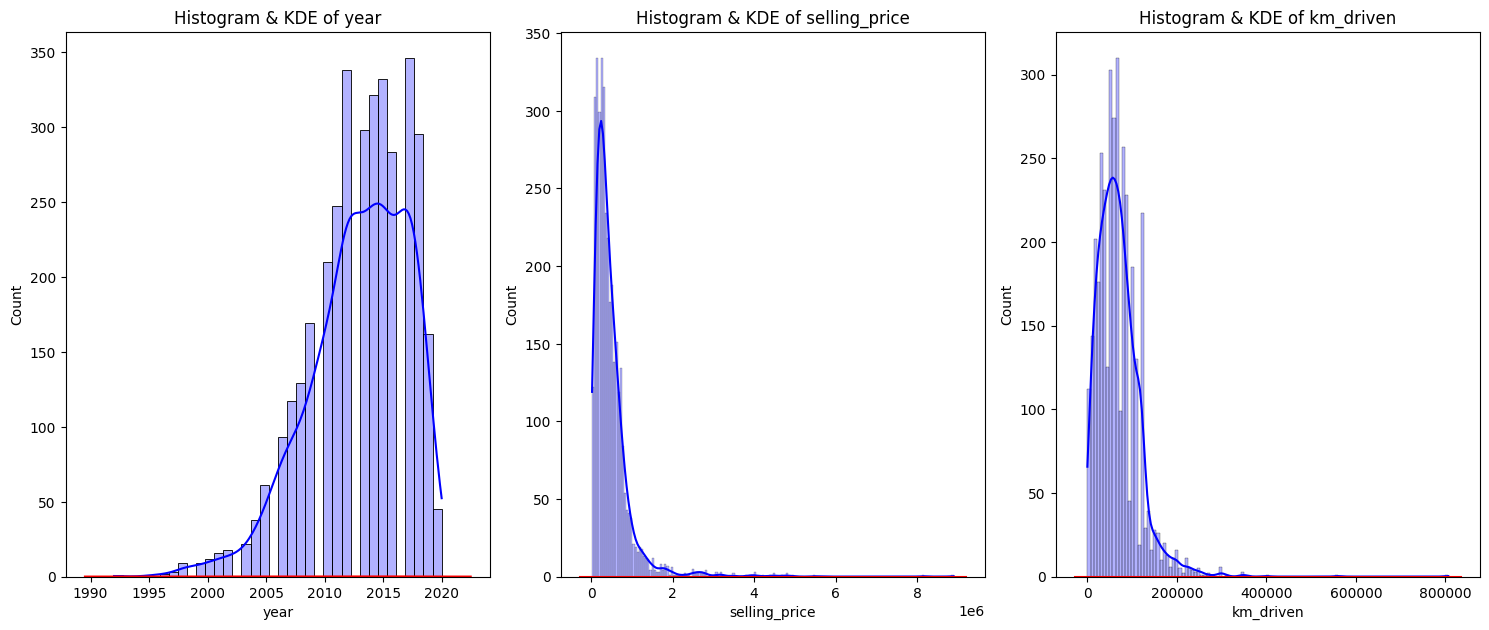

In [18]:
plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(Car_Cleaned_Data[col],kde=True, color='blue', alpha=0.3)
    sns.kdeplot(Car_Cleaned_Data[col],color='Red')
    plt.title(f'Histogram & KDE of {col}')
plt.tight_layout()
plt.show()

### II ) Let's Do some Univariate Analysis according to Categorical columns

### 1. Distribution of Top 10 car names

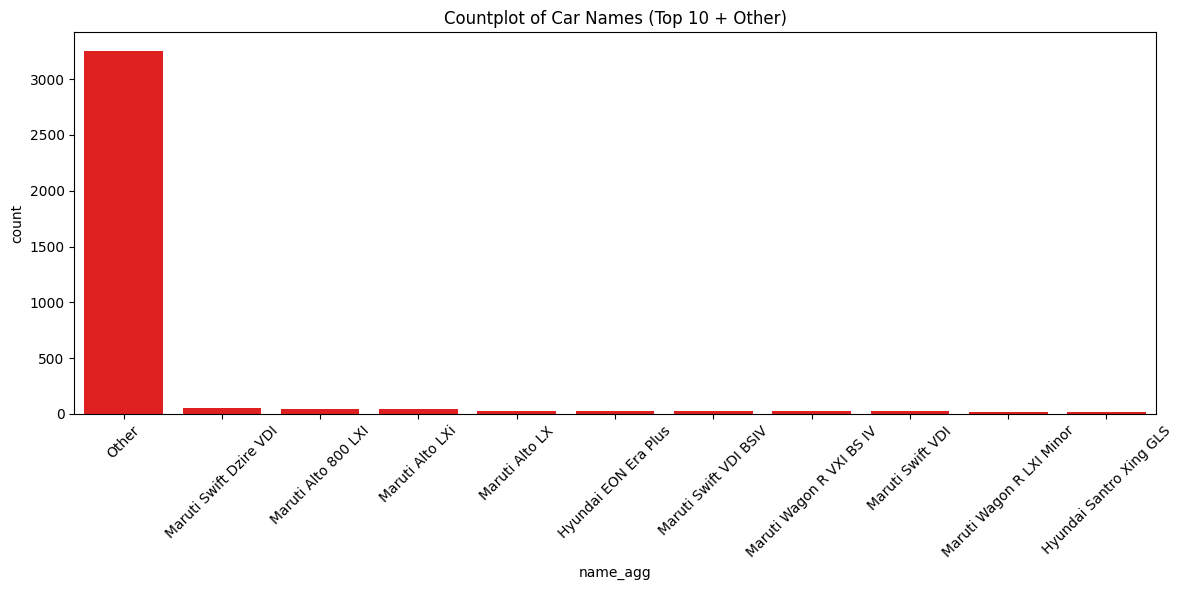

In [19]:
top_names = Car_Cleaned_Data['name'].value_counts().nlargest(10).index

# Create a new column with aggregated names
Car_Cleaned_Data['name_agg'] = Car_Cleaned_Data['name'].apply(lambda x: x if x in top_names else 'Other')

# Plot countplot for the aggregated names
plt.figure(figsize=(12, 6))
sns.countplot(x='name_agg', data=Car_Cleaned_Data, order=Car_Cleaned_Data['name_agg'].value_counts().index, color ='red')
plt.title('Countplot of Car Names (Top 10 + Other)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Distribution of fuel types

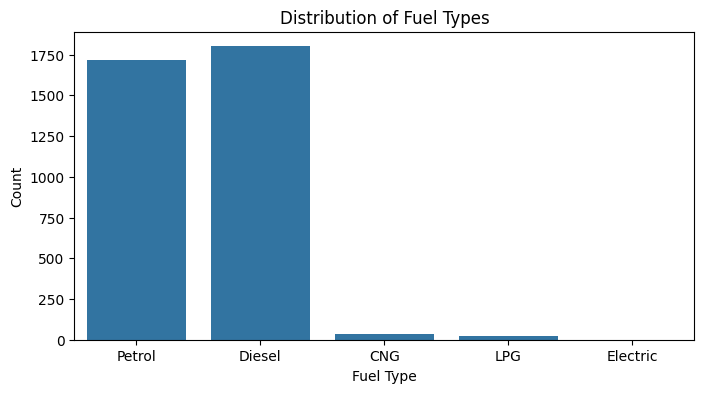

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(x='fuel', data=Car_Cleaned_Data)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### 3. Distribution of transmission types

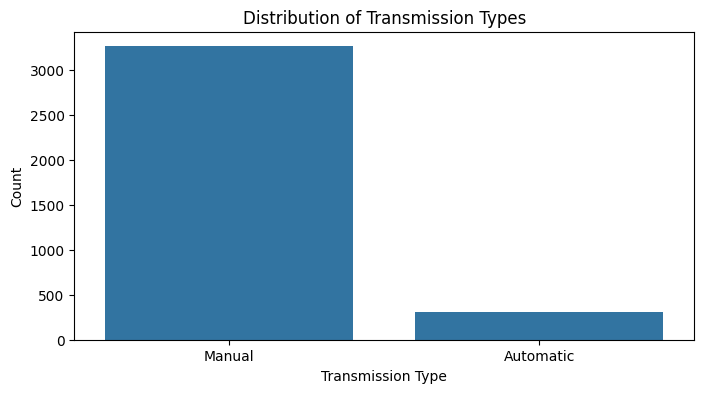

In [21]:

plt.figure(figsize=(8, 4))
sns.countplot(x='transmission', data=Car_Cleaned_Data)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

### 4. Distribution of owner types

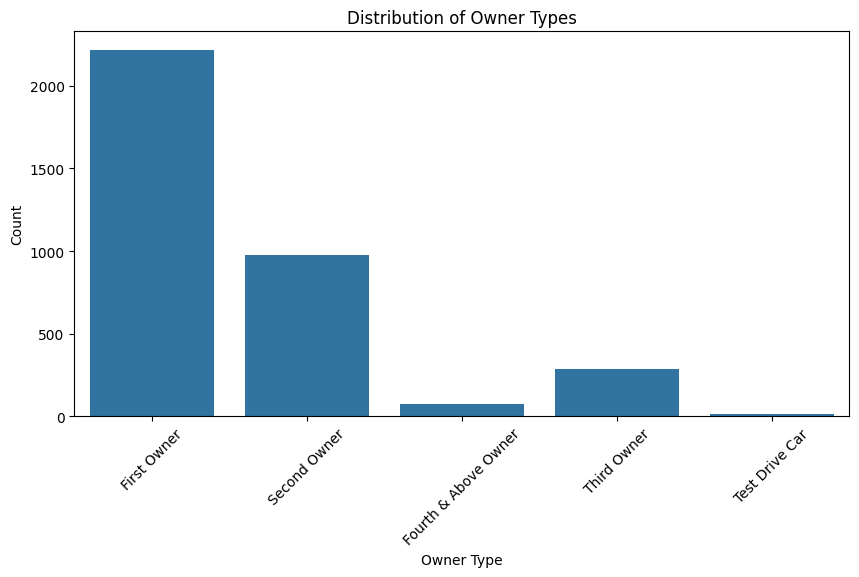

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='owner', data=Car_Cleaned_Data)
plt.title('Distribution of Owner Types')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### III ) Let's do some numric-numeric columns analysis

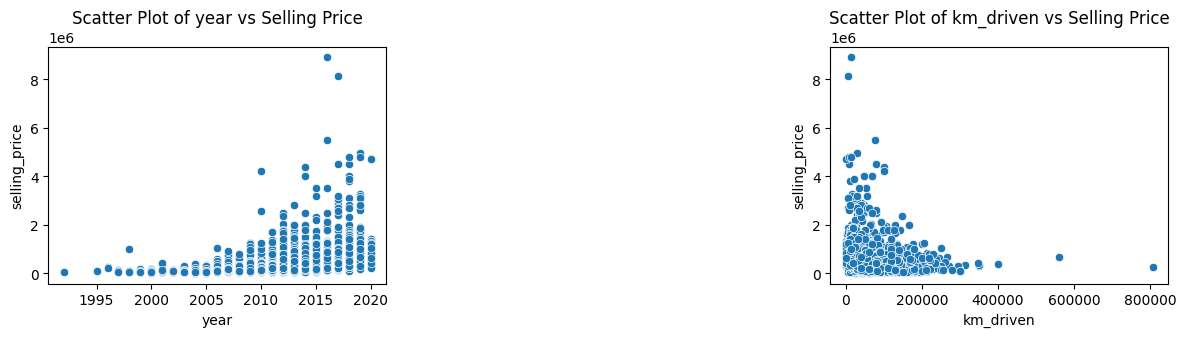

In [23]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    if col != 'selling_price':  # Assuming 'selling_price' is the target variable
        plt.subplot(2, 3, i)
        sns.scatterplot(x=Car_Cleaned_Data[col], y=Car_Cleaned_Data['selling_price'])
        plt.title(f'Scatter Plot of {col} vs Selling Price')
plt.tight_layout()
plt.show()

i) To Draw the heatmap

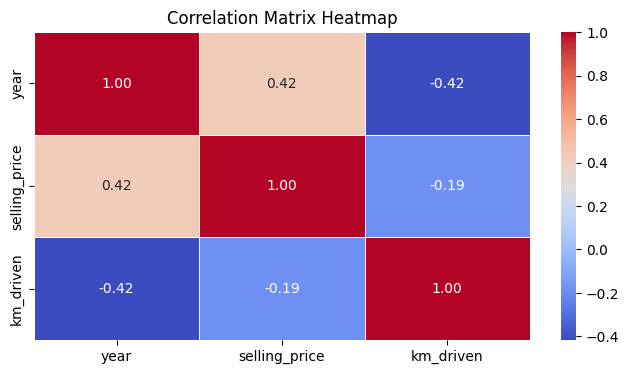

In [24]:
# Select only the numeric columns for correlation
numeric_cols = Car_Cleaned_Data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


ii) To draw a plot to show Relationship between selling price and kilometers driven

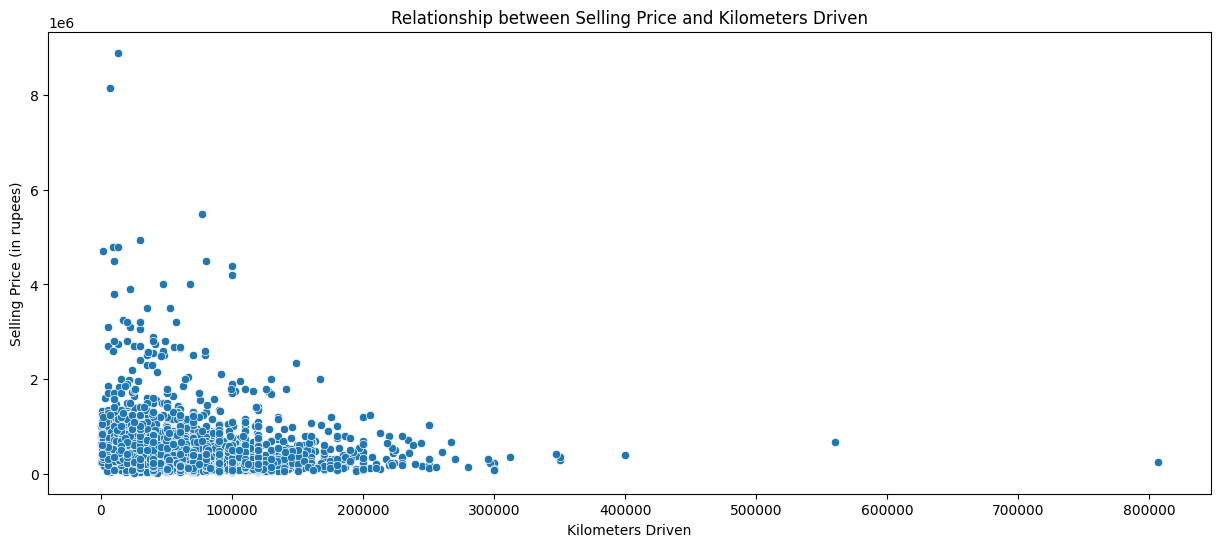

In [25]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=Car_Cleaned_Data)
plt.title('Relationship between Selling Price and Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (in rupees)')
plt.show()

iv) To draw a plot to show Relationship between selling price and year

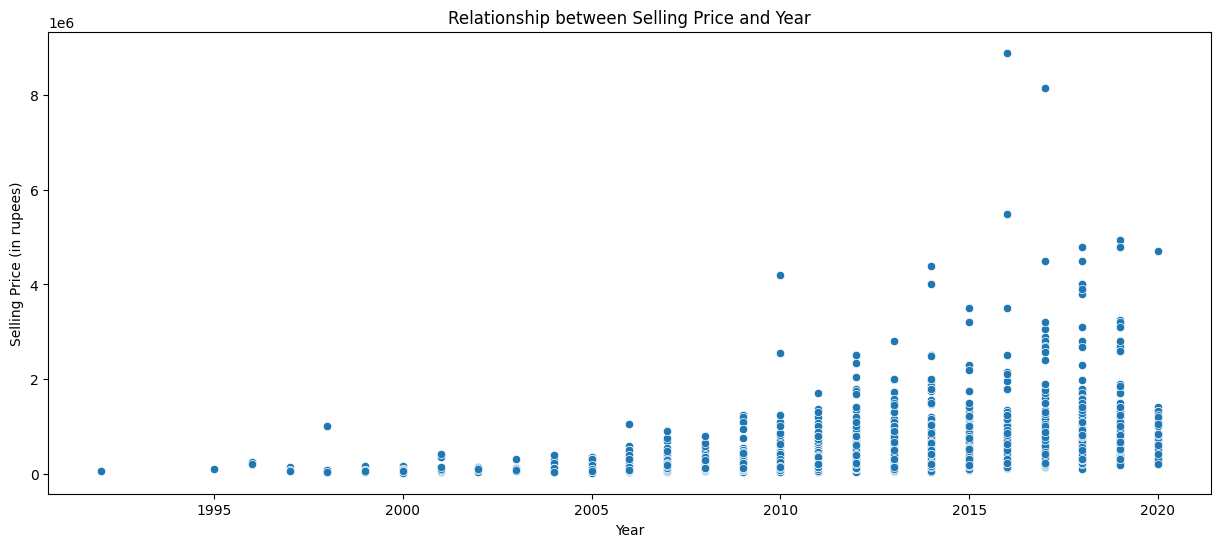

In [26]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='selling_price', data=Car_Cleaned_Data)
plt.title('Relationship between Selling Price and Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (in rupees)')
plt.show()

v) To Draw a joint plot with combination of scaterplots

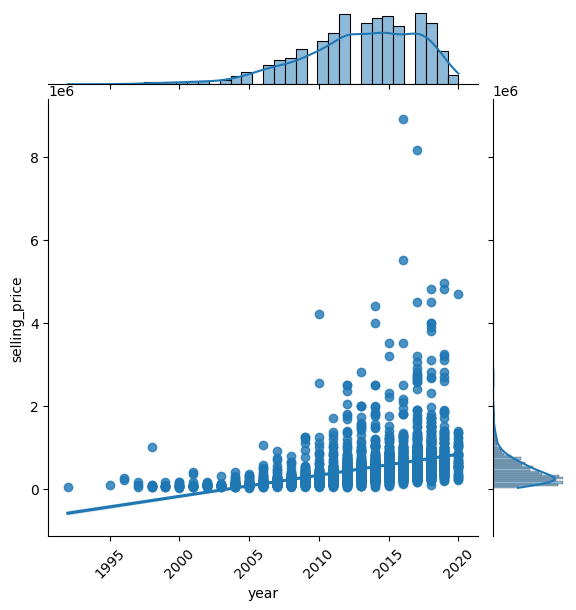

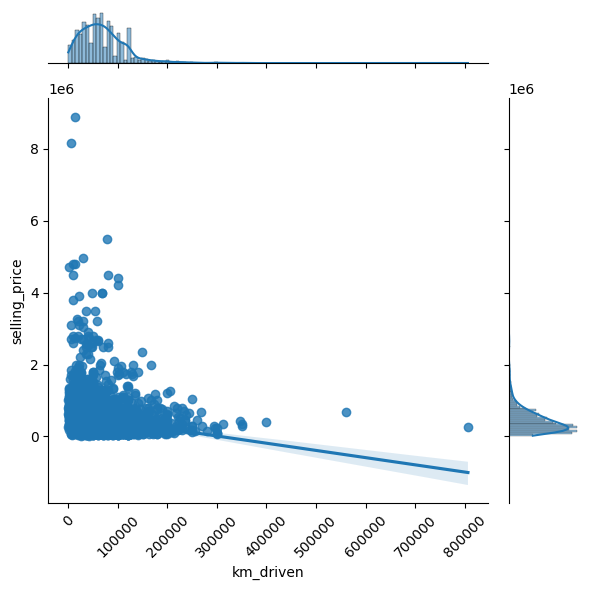

In [27]:
for col in numeric_cols:
    if col != 'selling_price':  # Assuming 'selling_price' is the target variable
        sns.jointplot(x=Car_Cleaned_Data[col], y=Car_Cleaned_Data['selling_price'], kind='reg')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# E ) Outlier Treatment

### Identify the outlier using IQR

In [28]:
def identify_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in a specific column
outliers_selling_price = identify_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(outliers_selling_price)


                                                name  year  selling_price  \
12                   Toyota Corolla Altis 1.8 VL CVT  2018        1650000   
16                        Jaguar XF 2.2 Litre Luxury  2014        1964999   
17              Mercedes-Benz New C-Class 220 CDI AT  2013        1425000   
22                   Audi A6 2.0 TDI  Design Edition  2013        1735000   
23    Mercedes-Benz New C-Class C 220 CDI Avantgarde  2012        1375000   
...                                              ...   ...            ...   
3487          Ford Ecosport 1.5 Diesel Titanium Plus  2019        1250000   
3491              Ford Endeavour 3.2 Titanium AT 4X4  2016        1800000   
3510                      Toyota Fortuner 2.7 2WD AT  2016        2500000   
3514                         Mahindra XUV500 W10 AWD  2015        1225000   
3550              Ford Endeavour 2.2 Titanium AT 4X2  2019        2800000   

      km_driven    fuel seller_type transmission         owner name_agg  
1

### Removing the outliers

In [29]:
def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers from a specific column
car_data_no_outliers = remove_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(car_data_no_outliers)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
3572  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
3573           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
3574                  Maruti 800 AC BSIII  2009         110000      83000   
3575     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
3576                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner                  name_a

### Handling outliers by cap treatment

In [30]:
# Function to cap outliers using IQR
def cap_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

# Cap outliers in a specific column
car_data_capped = cap_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(car_data_capped)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0      70000   
1                Maruti Wagon R LXI Minor  2007       135000.0      50000   
2                    Hyundai Verna 1.6 SX  2012       600000.0     100000   
3                  Datsun RediGO T Option  2017       250000.0      46000   
4                   Honda Amaze VX i-DTEC  2014       450000.0     141000   
...                                   ...   ...            ...        ...   
3572  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0      80000   
3573           Hyundai i20 Magna 1.4 CRDi  2014       409999.0      80000   
3574                  Maruti 800 AC BSIII  2009       110000.0      83000   
3575     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0      90000   
3576                     Renault KWID RXT  2016       225000.0      40000   

        fuel seller_type transmission         owner                  name_a

### As from the EDA we absorbed that there are outliers in KM_driven column,but they are much important for calculation so we will forward Car_Cleaned_Data dataset without outlier treatment

### Let's move for preprocessing for ML Models

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# F )  Encoding

In [33]:
df1 = pd.read_csv(r'/home/misfit/Downloads/Capstone Project 10-7-24/Car_Cleaned_Data')
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [34]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Drop the 'name' column from df1

In [35]:
df1.drop(columns=['name'], axis=1, inplace=True)

In [36]:
df1.columns # to check for the name column in dataset

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

i) Let's Standardize numerical features

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df1.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df1.select_dtypes(include=[np.number]))

ii) Figure out categorical columns from the dattset

In [38]:
categorical_columns = df1.select_dtypes(include=["object"]).columns.tolist()
print(categorical_columns)


['fuel', 'seller_type', 'transmission', 'owner']


iii) Apply label encoding on above categorical columns from the dataset

In [39]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
  df1[col] = encoder.fit_transform(df1[col])

In [40]:
df1 # to check the processed dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,-1.402566,-0.812819,0.015754,4,1,1,0
1,-1.402566,-0.665538,-0.404650,4,1,1,0
2,-0.226418,0.247604,0.646360,1,1,1,0
3,0.949731,-0.439708,-0.488731,4,1,1,0
4,0.244042,-0.046958,1.508188,1,1,1,2
...,...,...,...,...,...,...,...
3572,0.244042,-0.125510,0.225956,1,1,1,2
3573,0.244042,-0.125510,0.225956,1,1,1,2
3574,-0.932107,-0.714632,0.289016,4,1,1,2
3575,0.714501,0.767997,0.436158,1,1,1,0


# G) Selecting X and Y for train and test

In [41]:
# Selecting features (X) and target variable (y)
X = df1.drop(columns=['selling_price'])  # Assuming 'selling_price' is the target variable
y = df1['selling_price']

# H) Splitting Data into Train and Test and scaling

In [42]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df1.drop('selling_price', axis=1)
y = df1['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train         # to check the X_train

,year,km_driven,fuel,seller_type,transmission,owner
3394,0.949731,-0.404650,4,1,1,0
3127,1.420190,-1.119337,1,1,1,0
376,0.244042,-0.614852,4,1,1,2
436,-0.226418,-0.404650,4,1,1,0
2402,1.420190,-1.371579,1,1,1,0
...,...,...,...,...,...,...
1130,0.008812,-0.598646,4,0,1,0
1294,-0.226418,1.066764,1,1,1,0
860,1.184960,-0.404650,1,1,1,0
3507,0.949731,-0.719953,1,1,1,0


# i) Apply Linear regression model and find out MAE, MSE, r2 score

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a LinearRegression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate and print the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error (MAE):", mae)
print("Mean squared error (MSE):", mse)
print("R-squared (R2):", r2)


Mean absolute error (MAE): 0.41840262579693366
Mean squared error (MSE): 0.7175490923062854
R-squared (R2): 0.4103287531733937


# ii) Apply DecisionTree model and find out MAE, MSE, r2 score

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
tree_model = DecisionTreeRegressor()

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate and print the performance metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Model:")
print("Mean absolute error (MAE):", mae_tree)
print("Mean squared error (MSE):", mse_tree)
print("R-squared (R2):", r2_tree)


Decision Tree Model:
Mean absolute error (MAE): 0.46846041067632904
Mean squared error (MSE): 1.0736943981678981
R-squared (R2): 0.11765380060134278


#iii) Apply RandomForest model and find out MAE, MSE, r2 score

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
forest_model = RandomForestRegressor()

# Train the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_forest = forest_model.predict(X_test)

# Calculate and print the performance metrics
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Model:")
print("Mean absolute error (MAE):", mae_forest)
print("Mean squared error (MSE):", mse_forest)
print("R-squared (R2):", r2_forest)


Random Forest Model:
Mean absolute error (MAE): 0.3900856104441145
Mean squared error (MSE): 0.673918875037477
R-squared (R2): 0.4461834213655349


# iv) Apply KNN regression model and find out MAE, MSE, r2 score

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate and print the performance metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model:")
print("Mean absolute error (MAE):", mae_knn)
print("Mean squared error (MSE):", mse_knn)
print("R-squared (R2):", r2_knn)


KNN Model:
Mean absolute error (MAE): 0.381312433436666
Mean squared error (MSE): 0.6756431148662558
R-squared (R2): 0.44476646653893737


# v) Apply BaggingRegression model and find out MAE, MSE, r2 score

In [48]:
from sklearn.ensemble import BaggingRegressor

# Create a BaggingRegressor model
bagging_model = BaggingRegressor()

# Train the model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_model.predict(X_test)

# Calculate and print the performance metrics
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Bagging Model:")
print("Mean absolute error (MAE):", mae_bagging)
print("Mean squared error (MSE):", mse_bagging)
print("R-squared (R2):", r2_bagging)


Bagging Model:
Mean absolute error (MAE): 0.40491161601517084
Mean squared error (MSE): 0.7041939334673464
R-squared (R2): 0.42130382546958034


# vi) Apply GradientBoostingRegression model and find out MAE, MSE, r2 score


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate and print the performance metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Model:")
print("Mean absolute error (MAE):", mae_gb)
print("Mean squared error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)


Gradient Boosting Model:
Mean absolute error (MAE): 0.3536423503179537
Mean squared error (MSE): 0.6176304862524952
R-squared (R2): 0.4924403879655751


# vii)  Compare the above all regression models.

In [50]:
# Create a table to compare the performance metrics of all models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Bagging', 'Gradient Boosting']
mae_values = [mae, mae_tree, mae_forest, mae_knn, mae_bagging, mae_gb]
mse_values = [mse, mse_tree, mse_forest, mse_knn, mse_bagging, mse_gb]
r2_values = [r2, r2_tree, r2_forest, r2_knn, r2_bagging, r2_gb]

comparison_table = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
})

# Display the table
print(comparison_table.to_string())

               Model       MAE       MSE        R2
0  Linear Regression  0.418403  0.717549  0.410329
1      Decision Tree  0.468460  1.073694  0.117654
2      Random Forest  0.390086  0.673919  0.446183
3                KNN  0.381312  0.675643  0.444766
4            Bagging  0.404912  0.704194  0.421304
5  Gradient Boosting  0.353642  0.617630  0.492440


# viii) Save the best regression model in pickle file

In [51]:
import pickle

# Choose the best model based on your evaluation criteria (e.g., highest R2 score)
best_model = gb_model  # Replace this with the actual best model object

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)



# K ) Take 20 random data from Car Details.csv and apply the saved regression model

In [52]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### Took 20 random rows from the main dataset

In [53]:
car_random_df = df.sample(n=20, random_state=42).reset_index(drop=True)
car_random_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Eeco 7 Seater Standard BSIV,2018,270000,20000,Petrol,Individual,Manual,First Owner
1,Maruti Swift VXi BSIV,2017,525000,39000,Petrol,Dealer,Manual,First Owner
2,Toyota Innova 2.5 G (Diesel) 8 Seater,2016,990000,146000,Diesel,Dealer,Manual,First Owner
3,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
4,Honda Civic 1.8 S MT,2007,229999,70000,Petrol,Individual,Manual,Second Owner
5,Mahindra Xylo E4 8S,2010,325000,120000,Diesel,Individual,Manual,Third Owner
6,Hyundai Getz 1.3 GLS,2008,210000,53772,Petrol,Individual,Manual,First Owner
7,Fiat Punto EVO 1.3 Dynamic,2016,500000,35000,Diesel,Individual,Manual,First Owner
8,Honda Jazz 1.5 VX i DTEC,2018,790000,19571,Diesel,Dealer,Manual,First Owner
9,Honda Amaze E i-Vtech,2015,360000,80000,Petrol,Individual,Manual,Second Owner


### Preprocess the random model, Load the saved model and Apply the Model on the Selected Data Points and Test the Model

In [54]:
# Separate features (X) and target variable (y)
X_sample = car_random_df.drop(columns=['selling_price'])
y_sample = car_random_df['selling_price']


# Identify categorical and numerical columns
categorical_cols = X_sample.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
X_sample[X_sample.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_sample.select_dtypes(include=[np.number]))
# Preprocessing for categorical data
for col in categorical_columns:
  X_sample[col] = encoder.fit_transform(X_sample[col])


### Let's load the model using pickle

In [55]:
with open('best_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)


In [56]:
X_sample.drop(columns=['name'], axis=1, inplace=True)  #Drop the name column to get numerical columns

In [57]:
X_sample

,year,km_driven,fuel,seller_type,transmission,owner
0,1.136773,-1.191931,1,1,1,0
1,0.862852,-0.727624,1,0,1,0
2,0.588931,1.887161,0,0,1,0
3,1.136773,-1.436304,0,0,0,0
4,-1.876360,0.029931,1,1,1,1
5,-1.054597,1.251793,0,1,1,2
6,-1.602439,-0.366637,1,1,1,0
7,0.588931,-0.825373,0,1,1,0
8,1.136773,-1.202415,0,0,1,0
9,0.315009,0.274303,1,1,1,1


### Compare the predicted value with actual table values.

In [58]:
# Make predictions on the sample data
y_pred_sample = loaded_model.predict(X_sample)

# Compare predicted values with actual values
comparison_df = pd.DataFrame({
    'Actual Price': y_sample,
    'Predicted Price': y_pred_sample
})

print(comparison_df.to_string())


    Actual Price  Predicted Price
0         270000         0.963543
1         525000         0.620796
2         990000        -0.279332
3        3800000         2.594799
4         229999        -0.573149
5         325000        -0.723549
6         210000        -0.499056
7         500000        -0.383800
8         790000         0.443357
9         360000         0.021720
10        250000        -0.550262
11        160000        -0.699135
12        500000         0.056576
13        229999        -0.177134
14        360000        -0.551633
15        612000         0.265235
16        350000        -0.545604
17        800000        -0.039071
18        160000        -0.468700
19        330000        -0.109679
